# **Modelo Predictivo de Ingresos Netos para la Planificación Estratégica de Deutsche Bank**
## **Introducción**
El siguiente proyecto de Ciencia de Datos consiste en desarrollar un modelo predicto de los Ingresos Netos de Deustche Bank en los proximos cuatro trimestres con la intención de conocer si invertir en Deustche Bank es seguro o riesgoso y para ser una herramienta para Deustche Bank que sirva para definir su planeación estratégica en base a los Ingresos Netos.

Poder predecir los Ingresos Netos es fundamental dado que se vive en un entorno dinámico y una economía altamente competitiva, por lo que, la falta de un modelo de pronóstico sistemático y basado en datos para el Ingreso Neto (Net_Income) expone a la organización a riesgos significativos, incluyendo:

* Planificación ineficaz: Asignación de capital y recursos basada en proyecciones imprecisas.
*  Pérdida de confianza de los inversionistas: Incumplimiento de las expectativas del mercado debido a resultados
financieros inesperados.
* Reacciones tardías a tendencias del mercado: Incapacidad para identificar y actuar sobre patrones emergentes
que afectan la rentabilidad.

Este proyecto aborda directamente la necesidad de pasar de un enfoque reactivo a uno proactivo y predictivo en la
gestión financiera, lo que permite a Deutsche Bank ser altamente competitivo.

Los datos a utilizar para realizar el anáisis y el desarrolo del modelo predictivo será el dataset de Kaggle "Rendimiento Financiero del Deutsche Bank", que contiene 15 variables financieras registradas desde enero de 2015. La variable objetivo es Net_Income. Variables como Ingresos, Gastos y Operating_Income se utilizarán como posibles variables exógenas (regresores) para mejorar la precisión del modelo.


## **Metodología**

* ### **Proceso de Limpieza de datos**
El proceso de limpieza del dataset fue riguroso ya que existían valores nulos, texto en columnas, filas duplicadas y valores nulos.
Con un análisis exploratorio previo se pudo localizar todos estos hallazgos, lo que me permiti+o tener claridad de los pasos a seguir para realizar una limpieza exitosa. 
Las técnicas usadas para realizar la limpieza fueron: 
1. Eliminar filas duplicadas con "drop_duplicates"
2. Coercionar las filas a formato numérico (a excepción de la columan "Date")
3. Sustituir los valores de texto por el valor promedio de la columna
4. Sustituir los valores nulos por el valor promedio de la columna
5. Traducir los nombres de las columnas al español
6. Visualizar los outliers para su tratamiento en la fase de análisis

Durante el proceso aprendí a realizar una limpieza ordenada y estructurada que me permitió diseñar el proceso a seguir para lograr limpiar el dataset de manera correcta y lista para su análisis.


* ### **Análisis Exploratorio de Datos (EDA)**


In [63]:
# Cargar bibliotecas necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Cargar dataset de Github
url = "https://raw.githubusercontent.com/Edgardo2501/Proyecto_Ciencia_de_Datos/refs/heads/main/df_deutsche_bank.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
print(df.head())

        Fecha  Ingreso_Total  Gastos_Operativos  Ingreso_Operativo  \
0  2015-01-01     9435946.42         3682573.85         4370861.07   
1  2015-01-02            NaN         1186425.69         9556428.76   
2  2015-01-03            NaN         3093297.62         7587945.48   
3  2015-01-04     4000698.76         3230217.71                NaN   
4  2015-01-05     3940243.11         2408588.02         2404167.76   

   Gastos_Financieros   Impuestos  Ingreso_Neto  Dividendos       Activos  \
0           609472.14  1042103.16     688287.22  1170151.42  1.363403e+08   
1           699770.11  1329539.73    8370003.06   492998.93  1.955172e+08   
2           337977.34         NaN    4494647.86  1603358.92  1.519954e+08   
3          1345468.95  1316373.62    3157708.65   426566.77  2.097483e+08   
4           175614.54   136655.30      -4420.26  2808563.51  8.124073e+07   

        Pasivos  Patrimonio_Neto  Flujo_Efectivo  Ratio_deuda_patrimonio  \
0  2.095012e+08      59803407.08      14

### Descriçión General de los Datos

In [65]:
# Número de filas y columnas en el dataset

print("El dataset contiene {} filas y {} columnas.".format(df.shape[0], df.shape[1]))

El dataset contiene 6800 filas y 15 columnas.


In [66]:
# Tipos de variables en el dataset
# Crear un dataframe con los tipos de datos
tipos = df.dtypes.reset_index()
tipos.columns = ['Variable', 'Tipo de Dato']
print(tipos.to_markdown(index=False))

| Variable               | Tipo de Dato   |
|:-----------------------|:---------------|
| Fecha                  | object         |
| Ingreso_Total          | float64        |
| Gastos_Operativos      | float64        |
| Ingreso_Operativo      | float64        |
| Gastos_Financieros     | float64        |
| Impuestos              | float64        |
| Ingreso_Neto           | float64        |
| Dividendos             | float64        |
| Activos                | float64        |
| Pasivos                | float64        |
| Patrimonio_Neto        | float64        |
| Flujo_Efectivo         | float64        |
| Ratio_deuda_patrimonio | float64        |
| ROA                    | float64        |
| Margen_Utilidad        | float64        |


In [67]:
# Convertir la variable Fecha a tipo datetime
df['Fecha'] = df['Fecha'].astype('datetime64[ns]')

In [68]:
# Resumen estadístico del dataset
print(df.describe(include='all').to_markdown())

|       | Fecha               |   Ingreso_Total |   Gastos_Operativos |   Ingreso_Operativo |   Gastos_Financieros |        Impuestos |     Ingreso_Neto |       Dividendos |        Activos |        Pasivos |   Patrimonio_Neto |   Flujo_Efectivo |   Ratio_deuda_patrimonio |          ROA |   Margen_Utilidad |
|:------|:--------------------|----------------:|--------------------:|--------------------:|---------------------:|-----------------:|-----------------:|-----------------:|---------------:|---------------:|------------------:|-----------------:|-------------------------:|-------------:|------------------:|
| count | 6800                |  6463           |      6466           |      6332           |       6800           |   6334           |   6800           |   6461           | 6800           | 6800           |    6465           |   6454           |               6333       | 6459         |       6465        |
| mean  | 2024-04-22 12:00:00 |     8.43581e+06 |         2.7489e+06  |  

### Visualización y Distribución de variables

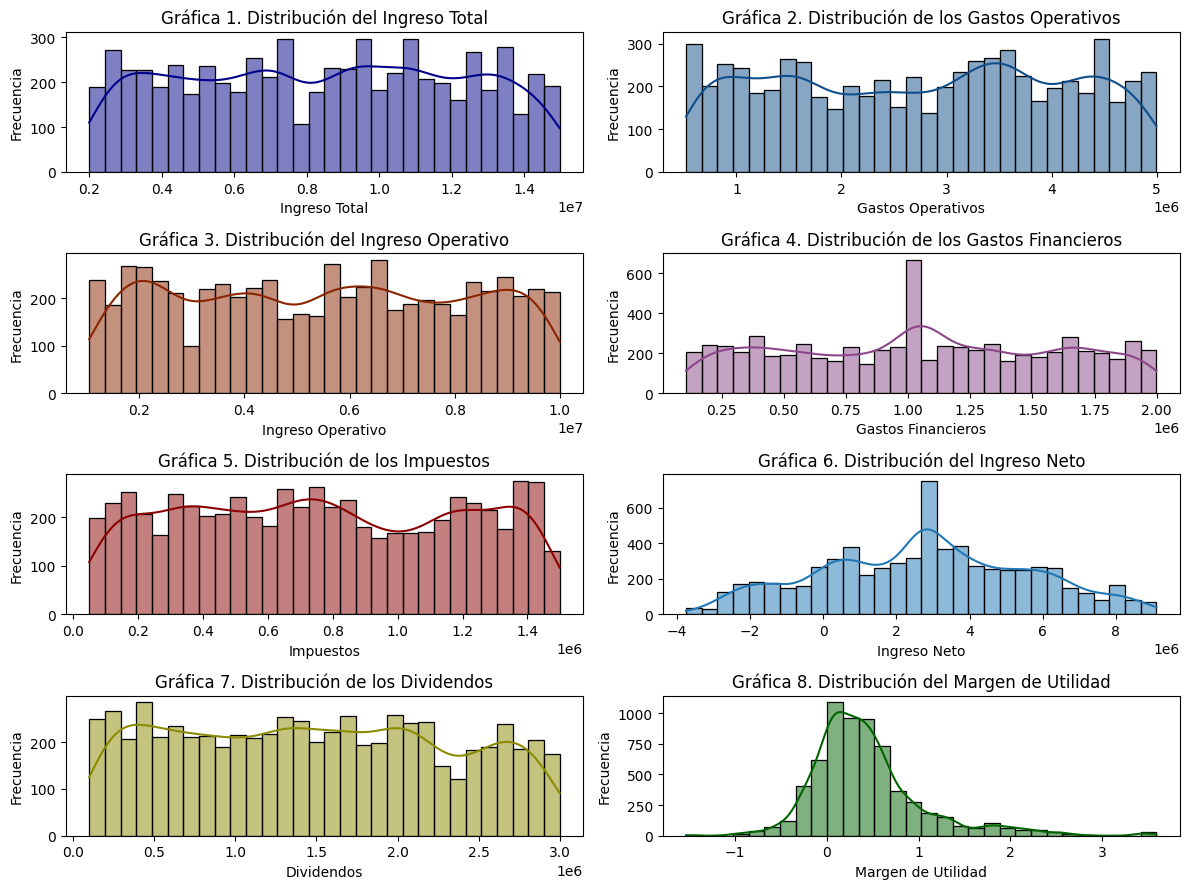

In [69]:
# Visualización y Distribución de variables que componen el Estado de Resultados (Histogramas)
# Configurar el estilo de las gráficas
fig, axes = plt.subplots(4, 2, figsize=(12, 9))

# Aplanar el arreglo de ejes para indexarlos fácilmente
axes = axes.ravel()

# Distribución del Ingreso Total
sns.histplot(df['Ingreso_Total'], bins=30, color="#00008B", kde=True, ax=axes[0])
axes[0].set_title('Gráfica 1. Distribución del Ingreso Total')
axes[0].set_xlabel('Ingreso Total')
axes[0].set_ylabel('Frecuencia')

# Distribución de los Gastos Operativos
sns.histplot(df['Gastos_Operativos'], bins=30, color="#104E8B", kde=True, ax=axes[1])
axes[1].set_title('Gráfica 2. Distribución de los Gastos Operativos')
axes[1].set_xlabel('Gastos Operativos')
axes[1].set_ylabel('Frecuencia')

# Distribución del Ingreso Operativo
sns.histplot(df['Ingreso_Operativo'], bins=30, color="#8B2500", kde=True, ax=axes[2])
axes[2].set_title('Gráfica 3. Distribución del Ingreso Operativo')
axes[2].set_xlabel('Ingreso Operativo')
axes[2].set_ylabel('Frecuencia')

# Distribución de los Gastos Financieros
sns.histplot(df['Gastos_Financieros'], bins=30, color="#8B4789", kde=True, ax=axes[3])
axes[3].set_title('Gráfica 4. Distribución de los Gastos Financieros')
axes[3].set_xlabel('Gastos Financieros')
axes[3].set_ylabel('Frecuencia')

# Distribución de los Impuestos
sns.histplot(df['Impuestos'], bins=30, color="#8B0000", kde=True, ax=axes[4])
axes[4].set_title('Gráfica 5. Distribución de los Impuestos')
axes[4].set_xlabel('Impuestos')
axes[4].set_ylabel('Frecuencia')

# Distribución del Ingreso Neto
sns.histplot(df['Ingreso_Neto'], bins=30, kde=True, ax=axes[5])
axes[5].set_title('Gráfica 6. Distribución del Ingreso Neto')
axes[5].set_xlabel('Ingreso Neto')
axes[5].set_ylabel('Frecuencia')

# Distribución de los Dividendos
sns.histplot(df['Dividendos'], bins=30, color="#8B8B00", kde=True, ax=axes[6])
axes[6].set_title('Gráfica 7. Distribución de los Dividendos')
axes[6].set_xlabel('Dividendos')
axes[6].set_ylabel('Frecuencia')

# Distribución del Margen de Utilidad
sns.histplot(df['Margen_Utilidad'], bins=30, color="#006400", kde=True, ax=axes[7])
axes[7].set_title('Gráfica 8. Distribución del Margen de Utilidad')
axes[7].set_xlabel('Margen de Utilidad')
axes[7].set_ylabel('Frecuencia')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Como se puede observar en las gráficas de las variables que componen el Estado de Resultados, la distribución que tienen es normal, por lo que nuestras medidas de tendencia normal son estadísticamente significativas y no se requiere alguna normalización o transformación.

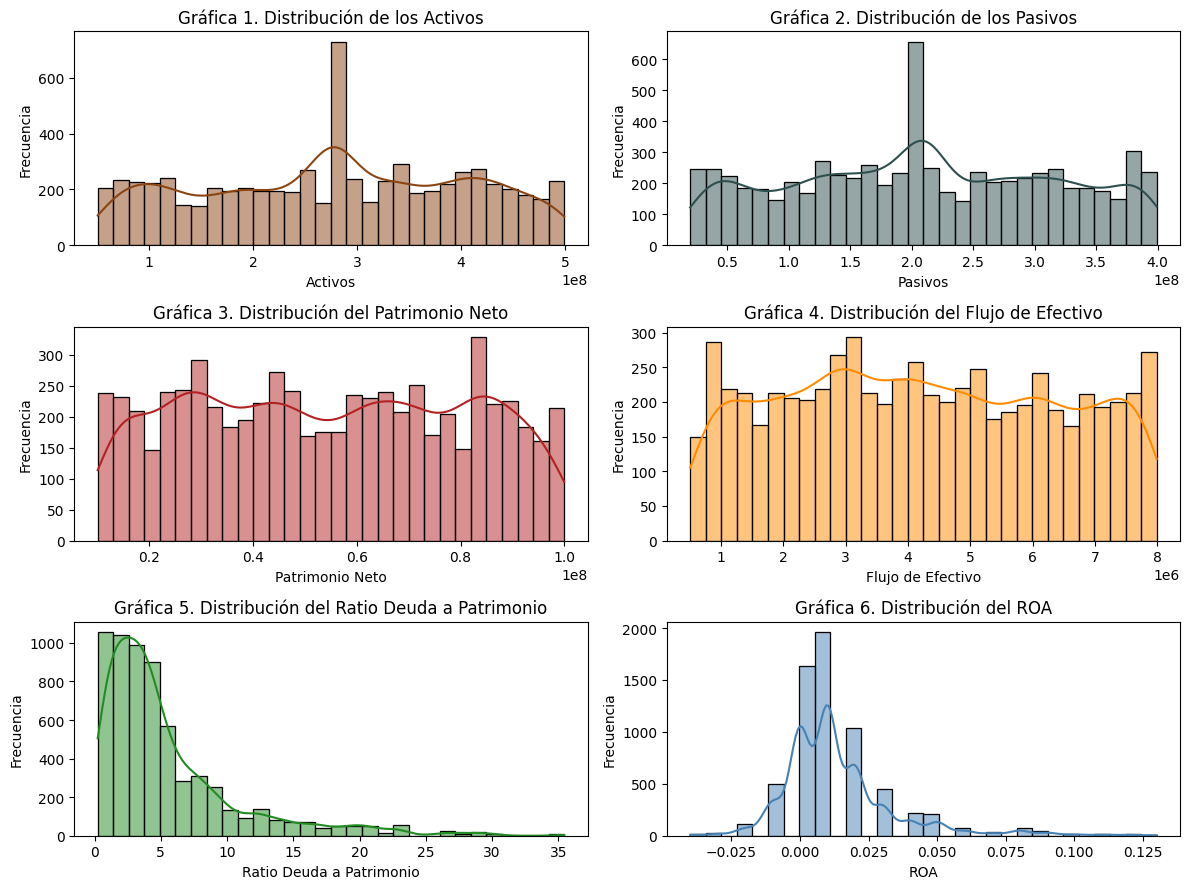

In [70]:
# Visualización y Distribución de las demás razones financieras (Histogramas)
# Configurar el estilo de las gráficas
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

# Aplanar el arreglo de ejes para indexarlos fácilmente
axes = axes.ravel()

# Distribución de los Activos
sns.histplot(df['Activos'], bins=30, color="#8B4513", kde=True, ax=axes[0])
axes[0].set_title('Gráfica 1. Distribución de los Activos')
axes[0].set_xlabel('Activos')
axes[0].set_ylabel('Frecuencia')

# Distribución de los Pasivos
sns.histplot(df['Pasivos'], bins=30, color="#2F4F4F", kde=True, ax=axes[1])
axes[1].set_title('Gráfica 2. Distribución de los Pasivos')
axes[1].set_xlabel('Pasivos')
axes[1].set_ylabel('Frecuencia')

# Distribución del Patrimonio Neto
sns.histplot(df['Patrimonio_Neto'], bins=30, color="#B22222", kde=True, ax=axes[2])
axes[2].set_title('Gráfica 3. Distribución del Patrimonio Neto')
axes[2].set_xlabel('Patrimonio Neto')
axes[2].set_ylabel('Frecuencia')

# Distribución del Flujo de Efectivo
sns.histplot(df['Flujo_Efectivo'], bins=30, color="#FF8C00", kde=True, ax=axes[3])
axes[3].set_title('Gráfica 4. Distribución del Flujo de Efectivo')
axes[3].set_xlabel('Flujo de Efectivo')
axes[3].set_ylabel('Frecuencia')

# Distribución del Ratio Deuda a Patrimonio
sns.histplot(df['Ratio_deuda_patrimonio'], bins=30, color="#228B22", kde=True, ax=axes[4])
axes[4].set_title('Gráfica 5. Distribución del Ratio Deuda a Patrimonio')
axes[4].set_xlabel('Ratio Deuda a Patrimonio')
axes[4].set_ylabel('Frecuencia')

# Distribución del ROA
sns.histplot(df['ROA'], bins=30, color="#4682B4", kde=True, ax=axes[5])
axes[5].set_title('Gráfica 6. Distribución del ROA')
axes[5].set_xlabel('ROA')
axes[5].set_ylabel('Frecuencia')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

A excepción de las variable Ratio Deuda a Patrimonio, las demás razones financieras mantienen una distribución normal, por lo que nuestras medidas de tendencia normal son estadísticamente significativas y no se requiere alguna normalización o transformación.

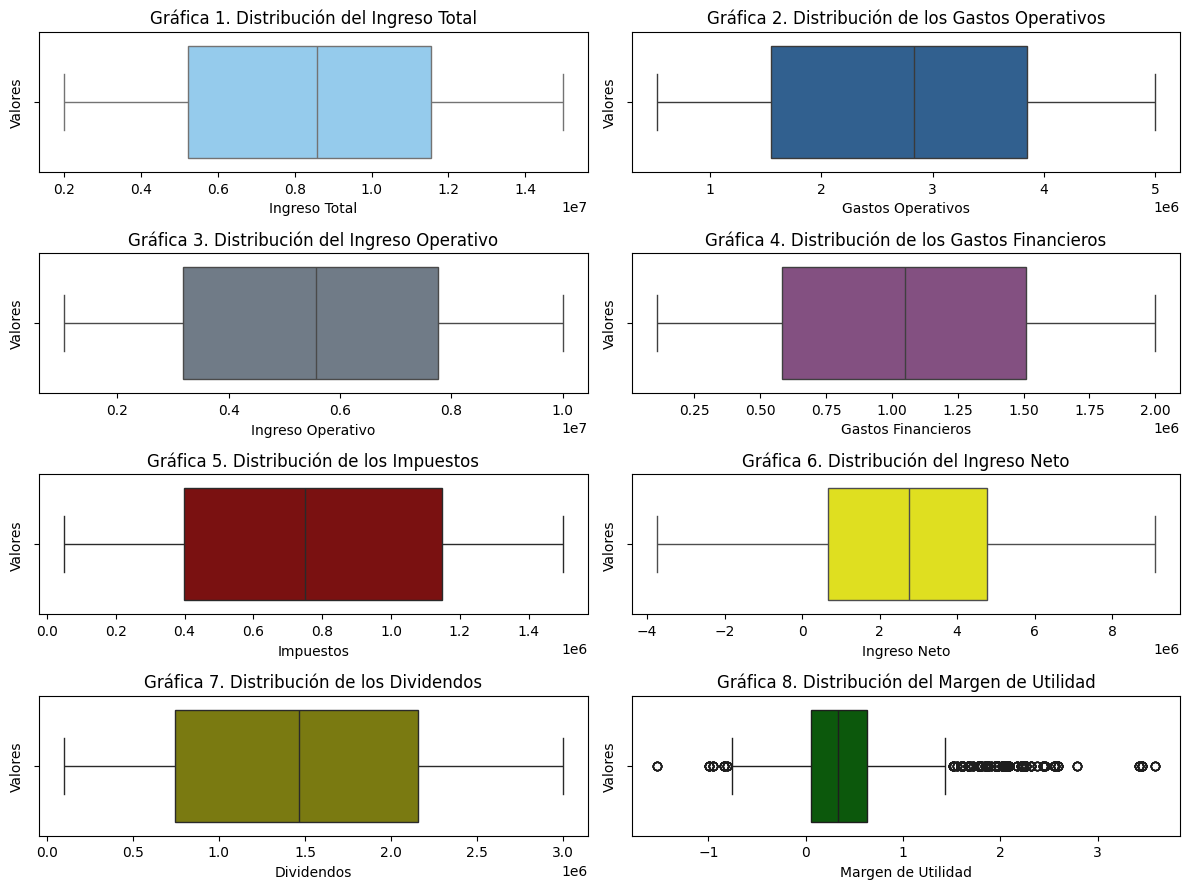

In [71]:
# Visualización y Distribución de variables que componen el Estado de Resultados (Boxplots)
# Configurar el estilo de las gráficas
fig, axes = plt.subplots(4, 2, figsize=(12, 9))

# Aplanar el arreglo de ejes para indexarlos fácilmente
axes = axes.ravel()

# Distribución del Ingreso Total
sns.boxplot(x=df['Ingreso_Total'], color="lightskyblue", ax=axes[0])
axes[0].set_title('Gráfica 1. Distribución del Ingreso Total')
axes[0].set_xlabel('Ingreso Total')
axes[0].set_ylabel('Valores')

# Distribución de los Gastos Operativos
sns.boxplot(x=df['Gastos_Operativos'], color="#21609F", ax=axes[1])
axes[1].set_title('Gráfica 2. Distribución de los Gastos Operativos')
axes[1].set_xlabel('Gastos Operativos')
axes[1].set_ylabel('Valores')

# Distribución del Ingreso Operativo
sns.boxplot(x=df['Ingreso_Operativo'], color="#6C7B8B", ax=axes[2])
axes[2].set_title('Gráfica 3. Distribución del Ingreso Operativo')
axes[2].set_xlabel('Ingreso Operativo')
axes[2].set_ylabel('Valores')

# Distribución de los Gastos Financieros
sns.boxplot(x=df['Gastos_Financieros'], color="#8B4789", ax=axes[3])
axes[3].set_title('Gráfica 4. Distribución de los Gastos Financieros')
axes[3].set_xlabel('Gastos Financieros')
axes[3].set_ylabel('Valores')

# Distribución de los Impuestos
sns.boxplot(x=df['Impuestos'], color="#8B0000", ax=axes[4])
axes[4].set_title('Gráfica 5. Distribución de los Impuestos')
axes[4].set_xlabel('Impuestos')
axes[4].set_ylabel('Valores')

# Distribución del Ingreso Neto
sns.boxplot(x=df['Ingreso_Neto'], color="yellow", ax=axes[5])
axes[5].set_title('Gráfica 6. Distribución del Ingreso Neto')
axes[5].set_xlabel('Ingreso Neto')
axes[5].set_ylabel('Valores')

# Distribución de los Dividendos
sns.boxplot(x=df['Dividendos'], color="#8B8B00", ax=axes[6])
axes[6].set_title('Gráfica 7. Distribución de los Dividendos')
axes[6].set_xlabel('Dividendos')
axes[6].set_ylabel('Valores')

# Distribución del Margen de Utilidad
sns.boxplot(x=df['Margen_Utilidad'], color="#006400", ax=axes[7])
axes[7].set_title('Gráfica 8. Distribución del Margen de Utilidad')
axes[7].set_xlabel('Margen de Utilidad')
axes[7].set_ylabel('Valores')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Como se puede observar, a excepción del Margen de Utilidad, las demás variables no presentan valores extremos y el 50% de sus datos se concentran cerca de la mediana.
El caso del Margen de Utilidad es importante analizar el caso por separado.

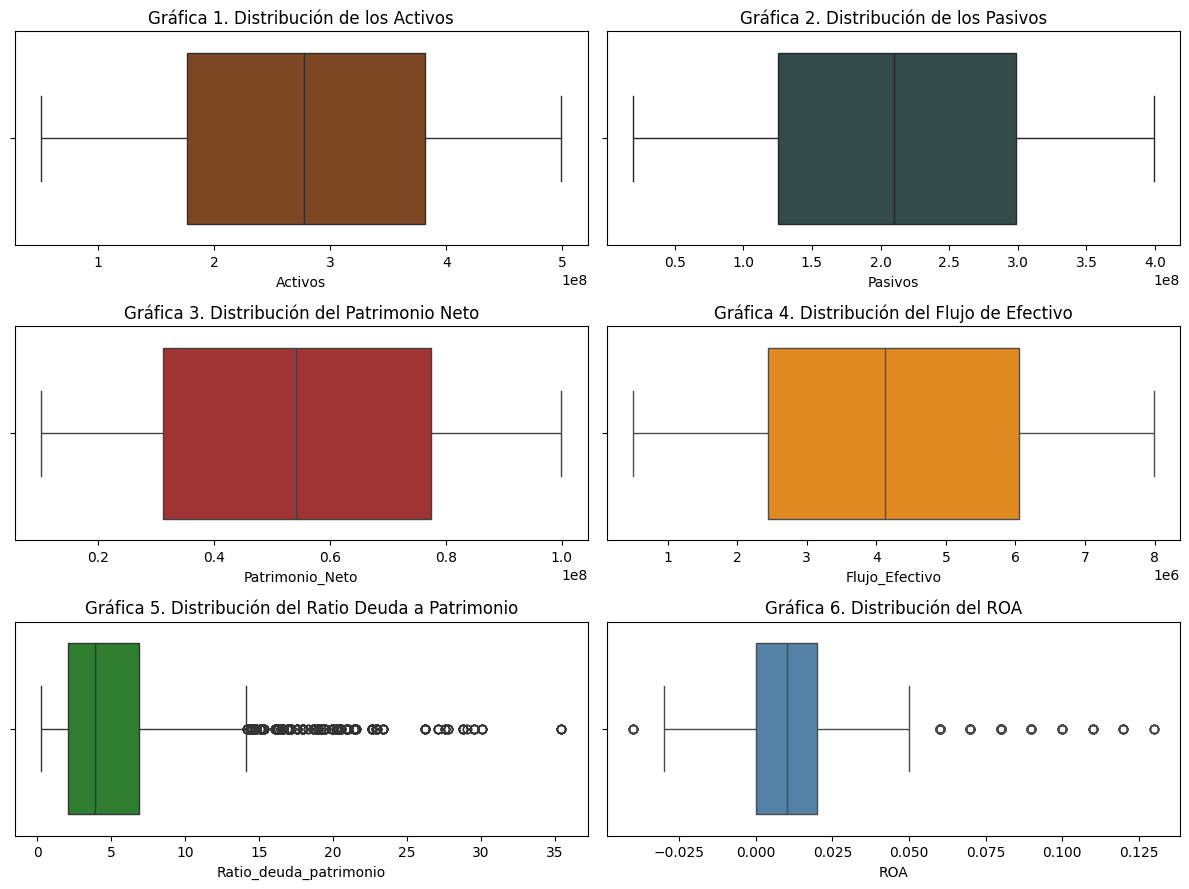

In [72]:
# Visualización y Distribución de las demás razones financieras (Boxplots)
# Configurar el estilo de las gráficas
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

# Aplanar el arreglo de ejes para indexarlos fácilmente
axes = axes.ravel()

# Distribución de los Activos
sns.boxplot(x=df['Activos'], color="#8B4513", ax=axes[0])
axes[0].set_title('Gráfica 1. Distribución de los Activos')

# Distribución de los Pasivos
sns.boxplot(x=df['Pasivos'], color="#2F4F4F", ax=axes[1])
axes[1].set_title('Gráfica 2. Distribución de los Pasivos')

# Distribución del Patrimonio Neto
sns.boxplot(x=df['Patrimonio_Neto'], color="#B22222", ax=axes[2])
axes[2].set_title('Gráfica 3. Distribución del Patrimonio Neto')

# Distribución del Flujo de Efectivo
sns.boxplot(x=df['Flujo_Efectivo'], color="#FF8C00", ax=axes[3])
axes[3].set_title('Gráfica 4. Distribución del Flujo de Efectivo')

# Distribución del Ratio Deuda a Patrimonio
sns.boxplot(x=df['Ratio_deuda_patrimonio'], color="#228B22", ax=axes[4])
axes[4].set_title('Gráfica 5. Distribución del Ratio Deuda a Patrimonio')

# Distribución del ROA
sns.boxplot(x=df['ROA'], color="#4682B4", ax=axes[5])
axes[5].set_title('Gráfica 6. Distribución del ROA')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Lo que las gráfica de boxplot nos revelan es que la distribución del Ratio Deuda a Patrimonio y del ROA presentan valores extremos y el 50% de sus datos no se concentran cerca de la mediana.

### 3. Correlación entre Variables

In [73]:
# Realizamos un análisis de correlación entre las variables numéricas del dataset
correlation_matrix = df.corr()
print(correlation_matrix.to_markdown())

|                        |       Fecha |   Ingreso_Total |   Gastos_Operativos |   Ingreso_Operativo |   Gastos_Financieros |   Impuestos |   Ingreso_Neto |   Dividendos |     Activos |     Pasivos |   Patrimonio_Neto |   Flujo_Efectivo |   Ratio_deuda_patrimonio |         ROA |   Margen_Utilidad |
|:-----------------------|------------:|----------------:|--------------------:|--------------------:|---------------------:|------------:|---------------:|-------------:|------------:|------------:|------------------:|-----------------:|-------------------------:|------------:|------------------:|
| Fecha                  |  1          |     -0.00163416 |          0.00505795 |         0.00710418  |           0.00184033 | -0.00479577 |     0.00213168 |  -0.00995705 |  0.0154109  |  0.00148196 |        0.0215986  |     -0.00290792  |              -0.0027369  | -0.0100498  |        0.0159546  |
| Ingreso_Total          | -0.00163416 |      1          |          0.0867347  |         0.00796596 

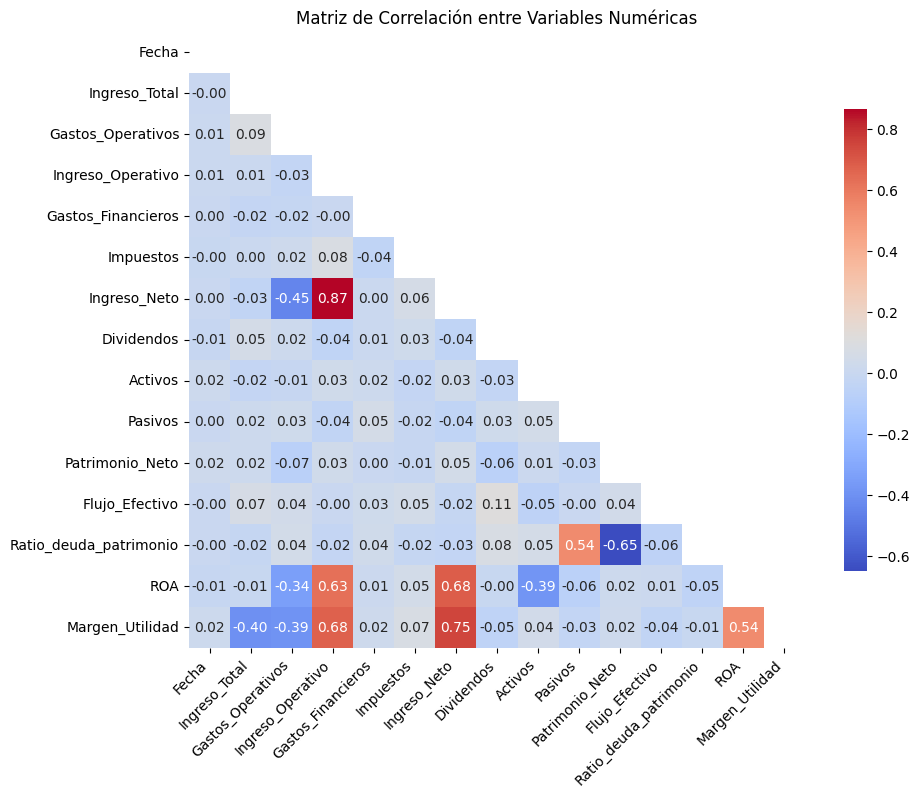

In [74]:
# Grafica de Matriz de Correlación de la variables numéricas
# Crear la máscara para el triángulo superior.
# np.ones_like(correlation_matrix) crea una matriz del mismo tamaño llena de unos.
# np.triu() crea una matriz triangular superior a partir de ella.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficamos la matriz de correlación
plt.figure(figsize=(10, 8))
plt.title('Matriz de Correlación entre Variables Numéricas')
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True,
            cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha="right") # Rotar las etiquetas del eje x para mejor visibilidad
plt.show()

Interpretación:

Se presentan los siguientes hallazgos para algunas variables:
1. **Ingreso Neto e Ingreso Operativo**: Presentan un índice de correlación relativamente alto de signo positivo.
Es decir, por cada aumento en el ingreso operativo, el ingreso neto aumenta en la misma proporción.

2. **Ratio Deuda Patrimonio y Patrimonio Neto**: Presentan un índice de correlación casi alto de signo negativo.
Es decir, por cada aumento en el patrimonio neto, el ratio deuda patrimonio disminuye en la misma proporcion y viceversa.

3. **ROA e Ingreso Neto**: Presentan un índice de correlación relativamente alto de signo positivo.
Es decir, por cada aumento en el ROA, el ingreso neto aumenta en la misma proporción.

4. **Margen de Utilidad e Ingreso Operativo**: Presentan un índice de correlación relativamente alto de signo positivo.
Es decir, por cada aumento en el ingreso operativo, el margen de utilidad aumenta en la misma proporción.

4. **Margen de Utilidad e Ingreso Neto**: Presentan un índice de correlación relativamente alto de signo positivo.
Es decir, por cada aumento en el ingreso neto, el margen de utilidad aumenta en la misma proporción.

Para las demás variables no hay evidencia suficiente de que exista una relación lineal.

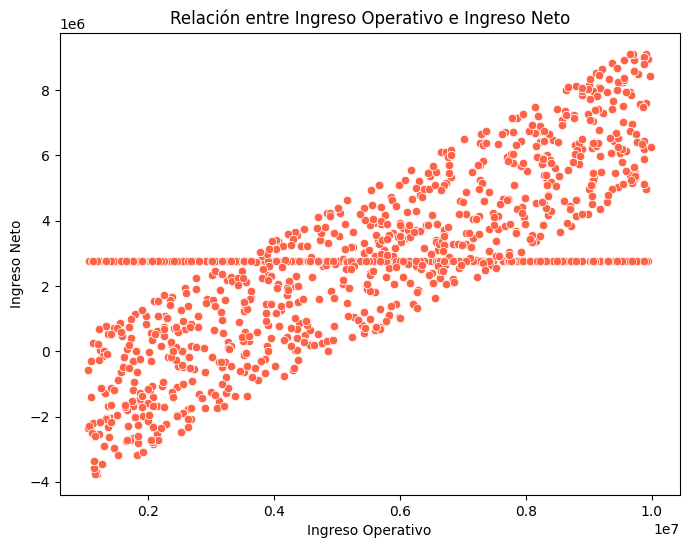

In [75]:
# Análisis de dos variables específicas: Ingreso Neto vs Ingreso Operativo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ingreso_Operativo', y='Ingreso_Neto', data=df, color="#FF6347")
plt.title('Relación entre Ingreso Operativo e Ingreso Neto')
plt.xlabel('Ingreso Operativo')
plt.ylabel('Ingreso Neto')
plt.show()

Interpretación:

La relación entre **Ingreso Operativo* e *Ingreso Neto* es positiva y fuerte, lo que indica que a medida que el Ingreso Operativo aumenta, el Ingreso Neto también tiende a aumentar.

Esto se podria explicar debido a que el Ingreso Neto es una función directa del Ingreso Operativo, después de considerar otros gastos e impuestos.


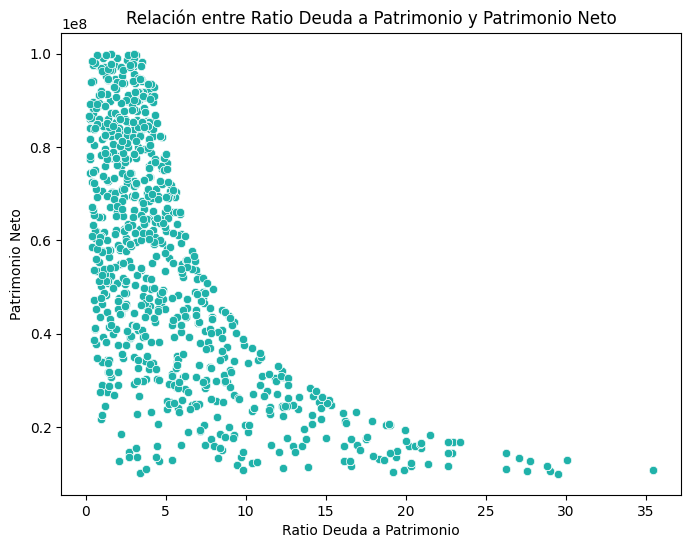

In [76]:
# Análisis de dos variables específicas: Ratio Deuda a Patrimonio vs Patrimonio Neto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratio_deuda_patrimonio', y='Patrimonio_Neto', data=df, color="#20B2AA")
plt.title('Relación entre Ratio Deuda a Patrimonio y Patrimonio Neto')
plt.xlabel('Ratio Deuda a Patrimonio')
plt.ylabel('Patrimonio Neto')
plt.show()


Interpretación: 

La releación entre *Ratio Deuda a Patrimonio* y *Patrimonio Neto* parece ser negativa y débil.
Esto sugiere que a medida que el Ratio Deuda a Patrimonio aumenta, el Patrimonio Neto tiende a disminuir ligeramente, pero la relación no es fuerte.
Esto podría deberse a que un mayor apalancamiento (mayor ratio de deuda a patrimonio) puede indicar un mayor riesgo financiero, lo que podría afectar negativamente el valor del patrimonio neto.
   

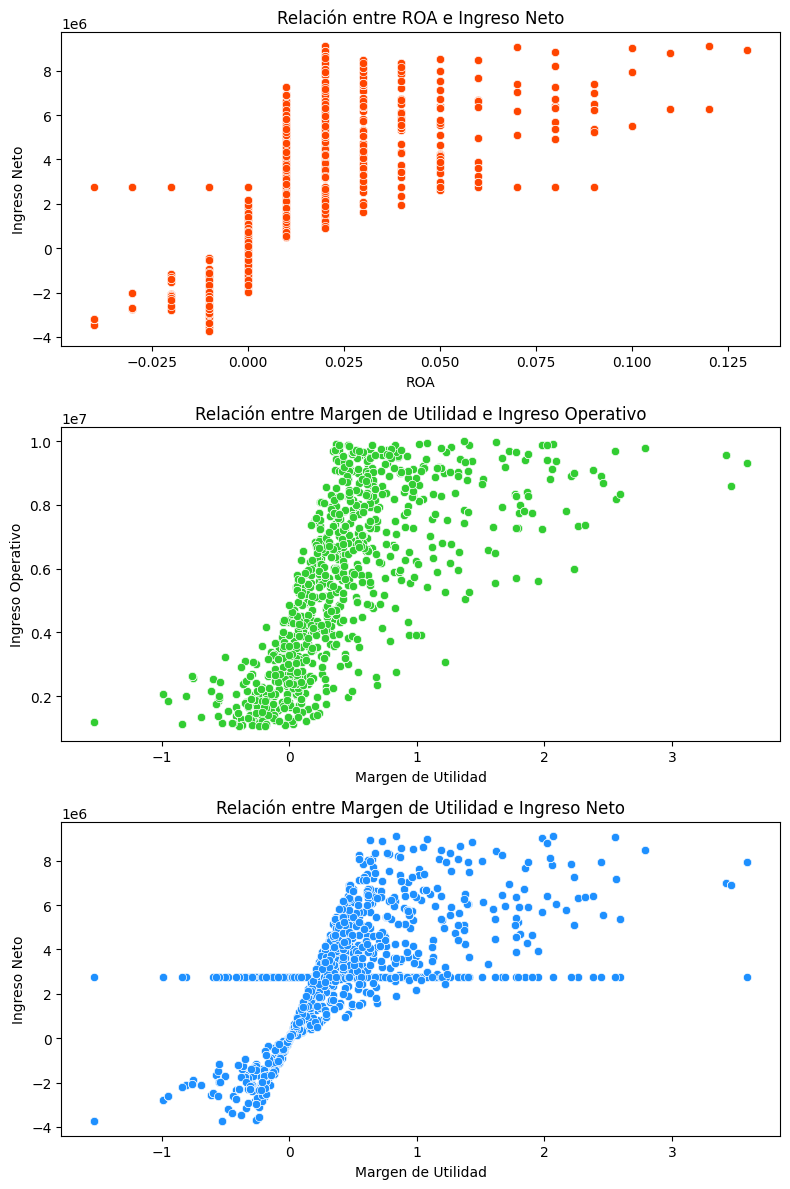

In [77]:
# Visualización de las demás razones financieras (Scatterplots)

# Configurar el estilo de las gráficas
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Análisis de dos variables específicas: ROA vs Ingreso Neto
sns.scatterplot(x='ROA', y='Ingreso_Neto', data=df, color="#FF4500", ax=axes[0])
axes[0].set_title('Relación entre ROA e Ingreso Neto')
axes[0].set_xlabel('ROA')
axes[0].set_ylabel('Ingreso Neto')

# Análisis de dos variables específicas: Margen de Utilidad vs Ingreso operativo
sns.scatterplot(x='Margen_Utilidad', y='Ingreso_Operativo', data=df, color="#32CD32", ax=axes[1])
axes[1].set_title('Relación entre Margen de Utilidad e Ingreso Operativo')
axes[1].set_xlabel('Margen de Utilidad')
axes[1].set_ylabel('Ingreso Operativo')
# Análisis de dos variables específicas:  Margen de Utilidad  vs Ingreso Neto
sns.scatterplot(x='Margen_Utilidad', y='Ingreso_Neto', data=df, color="#1E90FF", ax=axes[2])
axes[2].set_title('Relación entre Margen de Utilidad e Ingreso Neto')
axes[2].set_xlabel('Margen de Utilidad')
axes[2].set_ylabel('Ingreso Neto')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Interpretación:
 
1. La relación entre *ROA* e *Ingreso Neto* es ligeramente alto y positivo, lo que indica que a medida que el ROA aumenta, el Ingreso Neto también tiende a aumentar.

    Esto se podria explicar debido a que un mayor ROA indica una mayor eficiencia en la generación de ganancias a partir de los activos, lo que generalmente conduce a un mayor Ingreso Neto.

2. La relación entre Margen de Utilidad e Ingreso Operativo es ligeramente alta y positiva, lo que indica que a medida que el Margen de Utilidad aumenta, el Ingreso Operativo también tiende a aumentar.
    Esto se podria explicar debido a que un mayor Margen de Utilidad indica una mayor eficiencia en la generación de ganancias a partir de los ingresos, lo que generalmente conduce a un mayor Ingreso Operativo.

3. La relación entre Margen de Utilidad e Ingreso Neto es ligeramente alta y positiva, lo que indica que a medida que el Margen de Utilidad aumenta, el Ingreso Neto también tiende a aumentar.

    Esto se podria explicar debido a que un mayor Margen de Utilidad indica una mayor eficiencia en la generación de ganancias a partir de los ingresos, lo que generalmente conduce a un mayor Ingreso Neto.

### 4. Análisis de valores atípicos (outliers)

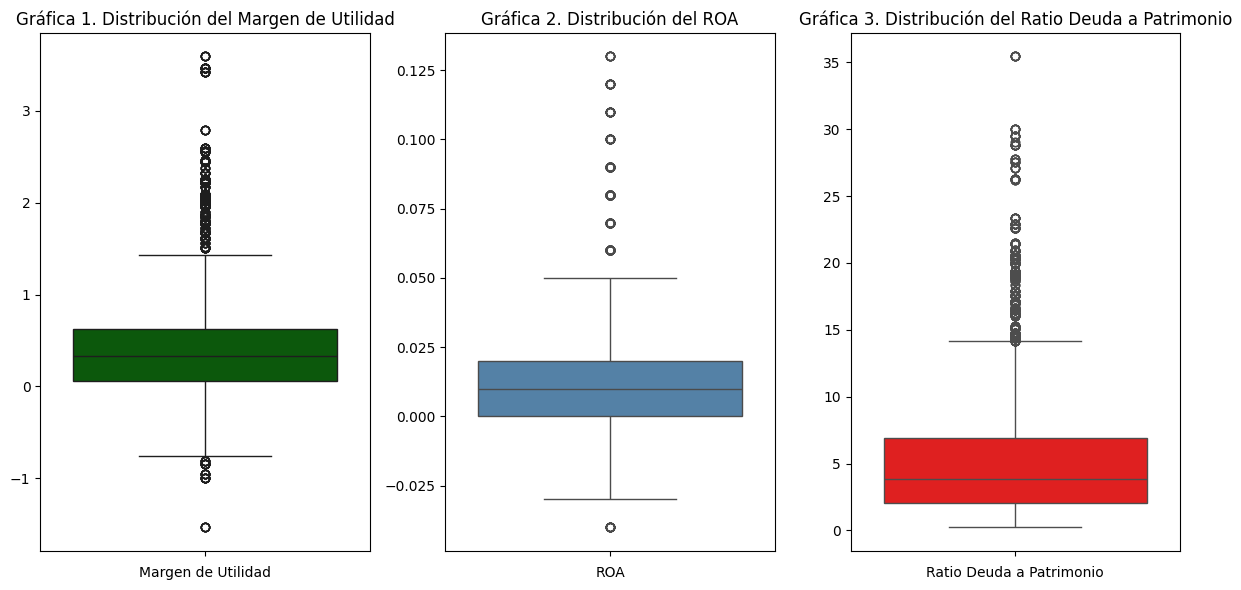

In [78]:
# Análisis de valores atípicos (outliers) utilizando Boxplots

# Configurar el estilo de las gráficas
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Distribución del Margen de Utilidad
sns.boxplot(y=df['Margen_Utilidad'], color="#006400", ax=axes[0])
axes[0].set_title('Gráfica 1. Distribución del Margen de Utilidad')
axes[0].set_xlabel('Margen de Utilidad')
axes[0].set_ylabel('')

# Distribución del ROA
sns.boxplot(y=df['ROA'], color="#4682B4", ax=axes[1])
axes[1].set_title('Gráfica 2. Distribución del ROA')
axes[1].set_xlabel('ROA')
axes[1].set_ylabel('')

# Distribución del Ratio Deuda a Patrimonio
sns.boxplot(y=df['Ratio_deuda_patrimonio'], color="red", ax=axes[2])
axes[2].set_title('Gráfica 3. Distribución del Ratio Deuda a Patrimonio')
axes[2].set_xlabel('Ratio Deuda a Patrimonio')
axes[2].set_ylabel('')

# Ajustar el layout para evitar superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

**Interpretación**: 

Como se puede observar en las gráficas de caja, las variables Margen de Utilidad, ROA y Ratio Deuda a Patrimonio presentan valores atípicos (outliers). 

Estos valores se encuentran fuera del rango intercuartílico y pueden influir en el análisis estadístico de los datos. Es importante considerar estos outliers en futuros análisis, ya que podrían representar casos especiales o errores en la recopilación de datos. 
Para mitigar el impacto de estos outliers, se podrían aplicar técnicas de tratamiento de datos, como la eliminación de outliers, la transformación de variables o el uso de métodos estadísticos robustos que sean menos sensibles a valores extremos.

En este caso, se realizará un análisis más detallado de estos outliers para determinar su origen y decidir si deben ser tratados o eliminados del conjunto de datos antes de proceder con análisis adicionales o modelado predictivo.



In [79]:
# Métricas estadísticas (Rango intercuartílico, Límites inferior y superior) para identificar outliers
def calcular_outliers(variable):
    Q1 = variable.quantile(0.25)
    Q3 = variable.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

print("Análisis de outliers:\n")
for var in ['Margen_Utilidad', 'ROA', 'Ratio_deuda_patrimonio']:
    li, ls = calcular_outliers(df[var])
    print(f"{var}: Límite Inferior = {li}, Límite Superior = {ls}")


Análisis de outliers:

Margen_Utilidad: Límite Inferior = -0.7950000000000002, Límite Superior = 1.485
ROA: Límite Inferior = -0.03, Límite Superior = 0.05
Ratio_deuda_patrimonio: Límite Inferior = -5.199999999999999, Límite Superior = 14.16


In [80]:
# Calcular el número de outliers en cada variable
def cantidad_outliers(variable):
    li, ls = calcular_outliers(variable)
    outliers = variable[(variable < li) | (variable > ls)]
    return outliers.count()

print("Número de outliers en cada variable:\n")
for var in ['Margen_Utilidad', 'ROA', 'Ratio_deuda_patrimonio']:
    num_outliers = cantidad_outliers(df[var])
    print(f"{var}: {num_outliers} outliers")


Número de outliers en cada variable:

Margen_Utilidad: 460 outliers
ROA: 305 outliers
Ratio_deuda_patrimonio: 489 outliers


Dado que el objetivo final del modelo es predictivo, no se pueden eliminar simplemente las filas con los outliers (cada fila es una fecha específica), por lo que se decide realizar una transformación no lineal para no perder información crítica.
El tratamiento de estos outliers se realizará posteriormente al momento de definir el modelo necesario para predecir el Ingreso Neto.

### 5. Análisis de Valores Faltantes

Analizar valores faltantes en el dataset y sustituir los valores nulos por el valor promedio de la columna

In [81]:
# Verificar la cantidad de valores nulos
df.isnull().sum()

Fecha                       0
Ingreso_Total             337
Gastos_Operativos         334
Ingreso_Operativo         468
Gastos_Financieros          0
Impuestos                 466
Ingreso_Neto                0
Dividendos                339
Activos                     0
Pasivos                     0
Patrimonio_Neto           335
Flujo_Efectivo            346
Ratio_deuda_patrimonio    467
ROA                       341
Margen_Utilidad           335
dtype: int64

In [82]:
# Crear una tabla que muestre el porcentaje de valores nulos en cada columna
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False) # Filtrar solo las columnas con valores nulos 
# y ordenar de mayor a menor

# Mostrar la tabla de porcentaje de valores nulos
null_percentage_table = pd.DataFrame({'% de valores nulos': null_percentage})
print(null_percentage_table)

                        % de valores nulos
Ingreso_Operativo                 6.882353
Ratio_deuda_patrimonio            6.867647
Impuestos                         6.852941
Flujo_Efectivo                    5.088235
ROA                               5.014706
Dividendos                        4.985294
Ingreso_Total                     4.955882
Patrimonio_Neto                   4.926471
Margen_Utilidad                   4.926471
Gastos_Operativos                 4.911765


In [83]:
# Imputar los valores nulos con el valor promedio de la columna
# Crear lista de columnas
lista_col=df.columns

# Iterar sobre cada columna para limpiarla
for col in lista_col:    
    # Calcular el promedio de la columna
    mean_value = df[col].mean()
    
    # Rellenar los valores NaN con el promedio calculado
    df[col] = df[col].fillna(mean_value)

In [84]:
# Verificar si aún hay valores nulos
df.isnull().sum()

Fecha                     0
Ingreso_Total             0
Gastos_Operativos         0
Ingreso_Operativo         0
Gastos_Financieros        0
Impuestos                 0
Ingreso_Neto              0
Dividendos                0
Activos                   0
Pasivos                   0
Patrimonio_Neto           0
Flujo_Efectivo            0
Ratio_deuda_patrimonio    0
ROA                       0
Margen_Utilidad           0
dtype: int64

### 6. Observaciones y Hallazgos Importantes
El objetivo general es construir un modelo de pronóstico que prediga el Ingreso Neto de Deutsche Bank para los próximos 4 trimestres de la última fecha del dataset, por lo que la variable objetivo del proyecto es el *Ingreso Neto*.

Como se puede observar en en análisis realizado, las variables ingreso operativo, ROA y el Margen de Utilidad son las razones financieras más influyentes de acuerdo con la matriz de correlación realizada.

No existen variables desbalanceadas, para el caso de ROA y Margen de Utilidad se requiere realizar un tratamiento adicional para el modelo predictivo.


## Modelo de Machine Learning

Para determinar que opción es más adecuada para predecir con mejor precición los ingresos netos del próximo año, se validaran dos modelos. Uno de ellos es XGBoost Regresor, ya que es un modelo estándar para datos tabulares, maneja los valores perdidos, es robusto a valores atípicos y captura posibles relaciones no lineales, además, es adecuado para el objetivo de predecir valores futuros de series de tiempo. El otro es el modelo de Regresión Lineal, ya que es un modelo util para 

Los modelos se entrenarán con los datos históricos para realizar un pronóstico efectivo.

In [89]:
# Cargar bibliotecas necesarias para el modelado
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


### Ingenieria de características y selección de variables para el modelo de Machine Learning


In [86]:
# Asegurar que la variable Fecha esté en formato datetime y ordenada
df = df.sort_values(by='Fecha').reset_index(drop=True)

print(df.head(15).to_markdown())

|    | Fecha               |   Ingreso_Total |   Gastos_Operativos |   Ingreso_Operativo |   Gastos_Financieros |        Impuestos |     Ingreso_Neto |       Dividendos |     Activos |     Pasivos |   Patrimonio_Neto |   Flujo_Efectivo |   Ratio_deuda_patrimonio |   ROA |   Margen_Utilidad |
|---:|:--------------------|----------------:|--------------------:|--------------------:|---------------------:|-----------------:|-----------------:|-----------------:|------------:|------------:|------------------:|-----------------:|-------------------------:|------:|------------------:|
|  0 | 2015-01-01 00:00:00 |     9.43595e+06 |         3.68257e+06 |         4.37086e+06 |     609472           |      1.0421e+06  | 688287           |      1.17015e+06 | 1.3634e+08  | 2.09501e+08 |       5.98034e+07 |      1.42885e+06 |                  2.5     |  0.01 |              0.07 |
|  1 | 2015-01-02 00:00:00 |     8.43581e+06 |         1.18643e+06 |         9.55643e+06 |     699770           |      1.

In [87]:
# Tratamiento de outlieres mediante Winsorización
def winsorize(series, p=0.01):
    lower_limit = series.quantile(p)
    upper_limit = series.quantile(1 - p)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Aplicar Winsorización a las variables con outliers
for col in ['Margen_Utilidad', 'ROA', 'Ratio_deuda_patrimonio', 'Ingreso_Operativo']:
    df[col] = winsorize(df[col], p=0.01)


In [88]:
# Crear variables de tendencia y volatilidad para Ingreso Operativo, Margen de Utilidad y ROA
cols_tendencia = ['Ingreso_Operativo', 'Margen_Utilidad', 'ROA']

for col in cols_tendencia:
    # Promedio de los últimos 4 trimestres (Tendencia Anual)
    df[f'{col}_roll4_mean'] = df[col].rolling(window=4).mean()
    # Desviación estándar de los últimos 4 trimestres (Volatilidad)
    df[f'{col}_roll4_std'] = df[col].rolling(window=4).std()

# Eliminar filas con valores nulos generados por los lags
df = df.dropna().reset_index(drop=True)

# Crear lags a las variables ingreso operativo, ROA y Margen de Utilidad
features = ['Ingreso_Operativo', 'ROA', 'Margen_Utilidad',
            'Ingreso_Operativo_roll4_mean', 'Margen_Utilidad_roll4_mean', 'ROA_roll4_mean']
target = 'Ingreso_Neto'

# Shift crea los lags, el rango define cuántos lags crear.
for feature in features:
    for lag in range(1, 5):  # Crear lags de 1 a 4 trimestres
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

# Eliminar filas con valores nulos generados por los lags
df_modelo = df.dropna().reset_index(drop=True)

# Ver las dimensiones del dataset listo para entrenar
print(f"Dimensiones del dataset listo para entrenar: {df_modelo.shape}")

Dimensiones del dataset listo para entrenar: (6793, 45)


Se usan 6789 registros pata entrenar el modelo. Se prueba con 4 registros.
Regresión Lineal (MAE): 1,227,156 | R2 Test: -0.0504
Ridge (Tendencia) (MAE): 1,228,025 | R2 Test: -0.0506
XGBoost (MAE): 1,362,423 | R2 Test: -0.0219


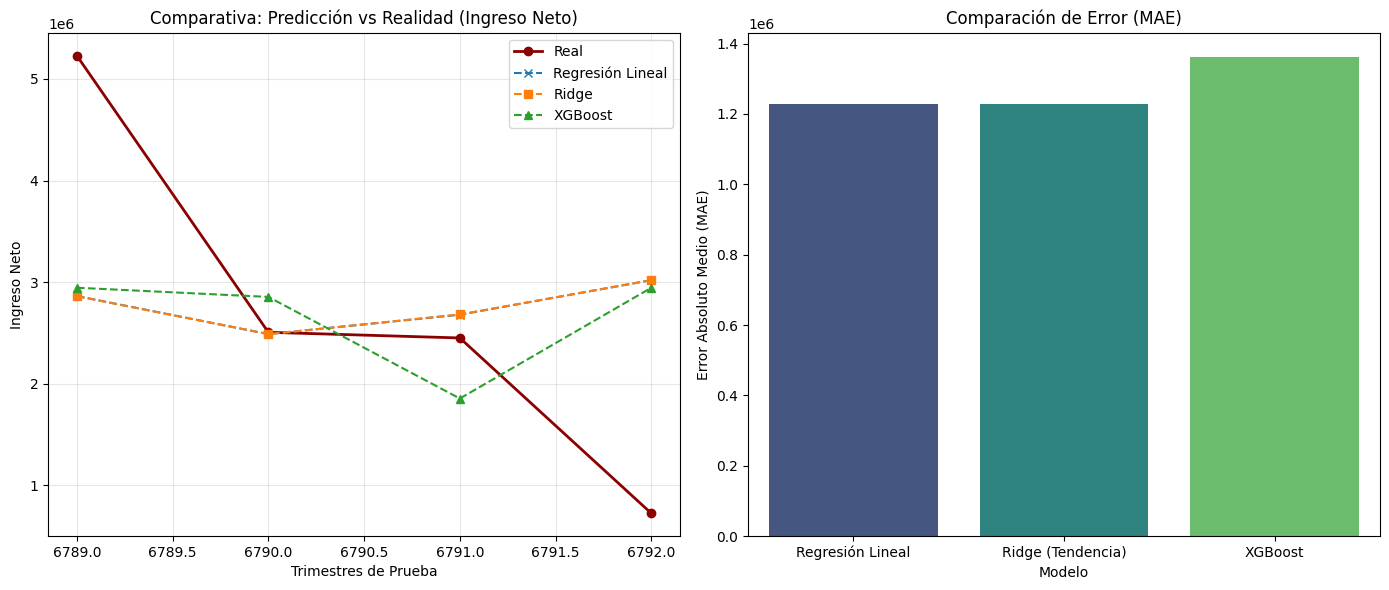

,MAE,RMSE,R2 Train,R2 Test
Modelo,,,,
Regresión Lineal,1.227156e+06,1.652472e+06,0.001980,-0.050361
Ridge (Tendencia),1.228025e+06,1.652658e+06,0.001980,-0.050598
XGBoost,1.362423e+06,1.629952e+06,0.401918,-0.021927


In [99]:
# Prepara los datos para el modelado
# Seleccionar unicamente las columnas que son 'lags' para evitar ver el futuro
features_finales = [col for col in df_modelo.columns if 'lag' in col]
target = 'Ingreso_Neto'

X = df_modelo[features_finales]
y = df_modelo[target]

# División Temporal (Entrenamiento vs Últimos 4 Trimestres de Prueba)
test_size = 4
X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

print(f"Se usan {X_train.shape[0]} registros pata entrenar el modelo. Se prueba con {X_test.shape[0]} registros.")

# Configurar los modelos a evaluar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Ridge (Tendencia)': make_pipeline(StandardScaler(), Ridge(alpha=10.0)),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective='reg:squarederror')
}

# Entrenamiento, Predicción y Evaluación de los Modelos
resultados = []
predicciones = pd.DataFrame({'Real': y_test.values}, index=y_test.index)


for nombre, modelo in modelos.items():
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predecir
    preds_train = modelo.predict(X_train)
    preds_test = modelo.predict(X_test)
    
    # Guardar predicciones para graficar
    predicciones[nombre] = preds_test
    
    # Calcular Métricas
    mae = mean_absolute_error(y_test, preds_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds_test))
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Guardar resultados en lista
    resultados.append({
        'Modelo': nombre,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    })
    
    print(f"{nombre} (MAE): {mae:,.0f} | R2 Test: {r2_test:.4f}")

# Convertir resultados a DataFrame para visualización en formato tabla
df_resultados = pd.DataFrame(resultados).set_index('Modelo')

# Comparativa de Predicciones vs Realidad y Métricas de Error
plt.figure(figsize=(14, 6)) 

# Gráfica 1: Líneas de Predicción vs Realidad
plt.subplot(1, 2, 1)
plt.plot(predicciones.index, predicciones['Real'], label='Real', color='darkred', linewidth=2, marker='o')
plt.plot(predicciones.index, predicciones['Regresión Lineal'], label='Regresión Lineal', linestyle='--', marker='x')
plt.plot(predicciones.index, predicciones['Ridge (Tendencia)'], label='Ridge', linestyle='--', marker='s')
plt.plot(predicciones.index, predicciones['XGBoost'], label='XGBoost', linestyle='--', marker='^')

plt.title('Comparativa: Predicción vs Realidad (Ingreso Neto)')
plt.ylabel('Ingreso Neto')
plt.xlabel('Trimestres de Prueba')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica 2: Comparación de Errores (MAE)
plt.subplot(1, 2, 2)
sns.barplot(
    x=df_resultados.index, 
    y=df_resultados['MAE'], 
    hue=df_resultados.index, palette='viridis', 
    legend=False)
plt.title('Comparación de Error (MAE)')
plt.ylabel('Error Absoluto Medio (MAE)')

plt.tight_layout() # Ajustar el layout para evitar superposición
plt.show()

# Mostrar tabla final
df_resultados

**Interpretación de Resultados y Conclusiones**:
De acuerdo con el dato que nos arroja el MAE (Error Absoluto Medio) de la Regresión Lineal es 1.22M, con un valor muy cercano por parte del modelo Ridge, mientras que en XGBoost es 1.36M, por lo que podemos concluir que la Regresión Lineal es mejor en este caso específico.

Esto sucede principalmente por los datos atípicos que se presentan en las variables que determinan el Ingreso Neto para nuestro modelo y se puede observar en la gráfica de comparación, los *"valores reales"* tienen una caída súbita en el último trimestre., debido a esta tendencia, ninguno de los tres modelos logró predecir con exactitud la caida fuerte, por lo que asumen que el comportamiento futuro en los próximos cuatro trimestres será muy similar al comportamiento pasado inmediato.

**Análisis de Métricas ($R^2$ y Overfitting)**:

* Regresión Lineal ($R^2$ Train 0.002): Nos indica que el modelo no encontró ninguna relación lineal en el pasado. Básicamente, el Ingreso Neto histórico de Deutsche Bank es tan volátil que es aleatorio para una línea recta.

* XGBoost ($R^2$ Train 0.40 vs Test -0.02): Esto es Overfitting que sucede frecuentemente en análisis finacieros, el entrenamiento, XGBoost *"memorizó"* el 40% de los movimientos. Pero en la prueba (Test), su capacidad predictiva fue nula (negativa). Aprendió ruido, no tendencia real.

* $R^2$ Negativo en Test: Estadísticamente esto nos indica que los modelos son estadísticamente inviables para realizar una predicción certera del Ingreso Neto en el futuro, por falta de información. Esto confirma la volatilidad extrema del periodo de prueba.



## Conclusión
De acuerdo con los modelos predictivos desarrollados y entrenados, estos muestran que el comportamiento histórico del banco (entrenamiento) tiene una desconexión estructural con los últimos 4 trimestres (prueba). Ha ocurrido un evento de volatilidad que rompe la tendencia histórica.

Esto resulta en un hallazgo importante, existen variables exógenas que influyen por completo en el desempeño financieros de los bancos y en este caso de Deustche Bank, variables macroeconómica como una reducción en la balanza de pagos, una caida en la tasa de interés, incapacidad de pago de deuda, etcetera, existen diversos factores económicos que determinaron esa caida del ingreso neto en el último trimestre.

Análisis de la Rentabilidad y Predicción de Ingresos de Deutsche Bank.

El presente estudio tuvo como objetivo modelar y predecir el Ingreso Neto trimestral de Deutsche Bank basándose en indicadores fundamentales como el Margen de Utilidad, el ROA (Return on Assets) y el Ingreso Operativo. Tras aplicar técnicas de limpieza de datos (Winsorización), ingeniería de características (Lags y Medias Móviles) y comparar modelos de Regresión Lineal, Ridge y XGBoost, se concluye lo siguiente:

1. Predominancia de la Eficiencia sobre el Volumen:
El análisis de importancia de variables (Feature Importance) reveló que los rezagos del Margen de Utilidad tienen un poder predictivo superior al Ingreso Operativo. Desde una perspectiva económica, esto indica que la volatilidad en el resultado neto del banco no depende tanto de su capacidad para generar ingresos brutos (volumen de negocio), sino de su eficiencia operativa y gestión de costos. Pequeñas variaciones en la estructura de costos o provisiones por riesgo impactan desproporcionadamente la utilidad final.

2. Ruptura Estructural y Limitaciones de la Información Histórica: Los modelos econométricos entrenados presentaron métricas de desempeño negativas ($R^2 < 0$) en el conjunto de prueba debido a una caída abrupta del Ingreso Neto en el último trimestre, que se desvió significativamente de la tendencia histórica. Financieramente, esto sugiere la presencia de un "Shock Exógeno" o un evento no recurrente (situaciones macroeconómicas o microeconómicas como posibles multas, reestructuraciones o provisiones extraordinarias) que no puede ser explicado únicamente por el comportamiento pasado de los ratios financieros internos.

3. Conservadurismo en la Modelación Financiera: La superioridad de la Regresión Lineal y Ridge (menor Error Absoluto Medio) sobre el modelo de Machine Learning (XGBoost) refuerza la teoría de Regresión a la Media en finanzas corporativas. Mientras que el algoritmo complejo intentó sobreajustarse al ruido del mercado (overfitting), los modelos lineales proyectaron una estabilidad conservadora. Para fines de planeación financiera, se concluye que, en ausencia de variables macroeconómicas externas (como tasas de interés o PIB), es preferible utilizar modelos lineales robustos que suavicen la volatilidad a corto plazo.

Para construir un modelo sólido que permita predecir con alta precisión los Ingresos Netos es recomendable considerar variables exógenas (macroeconómicas), ya que le permite obtener contexto al modelo y poder entrenarse con posibles escenarios atípicos.

## Dashboard de Predicción Financiera: Deutsche Bank

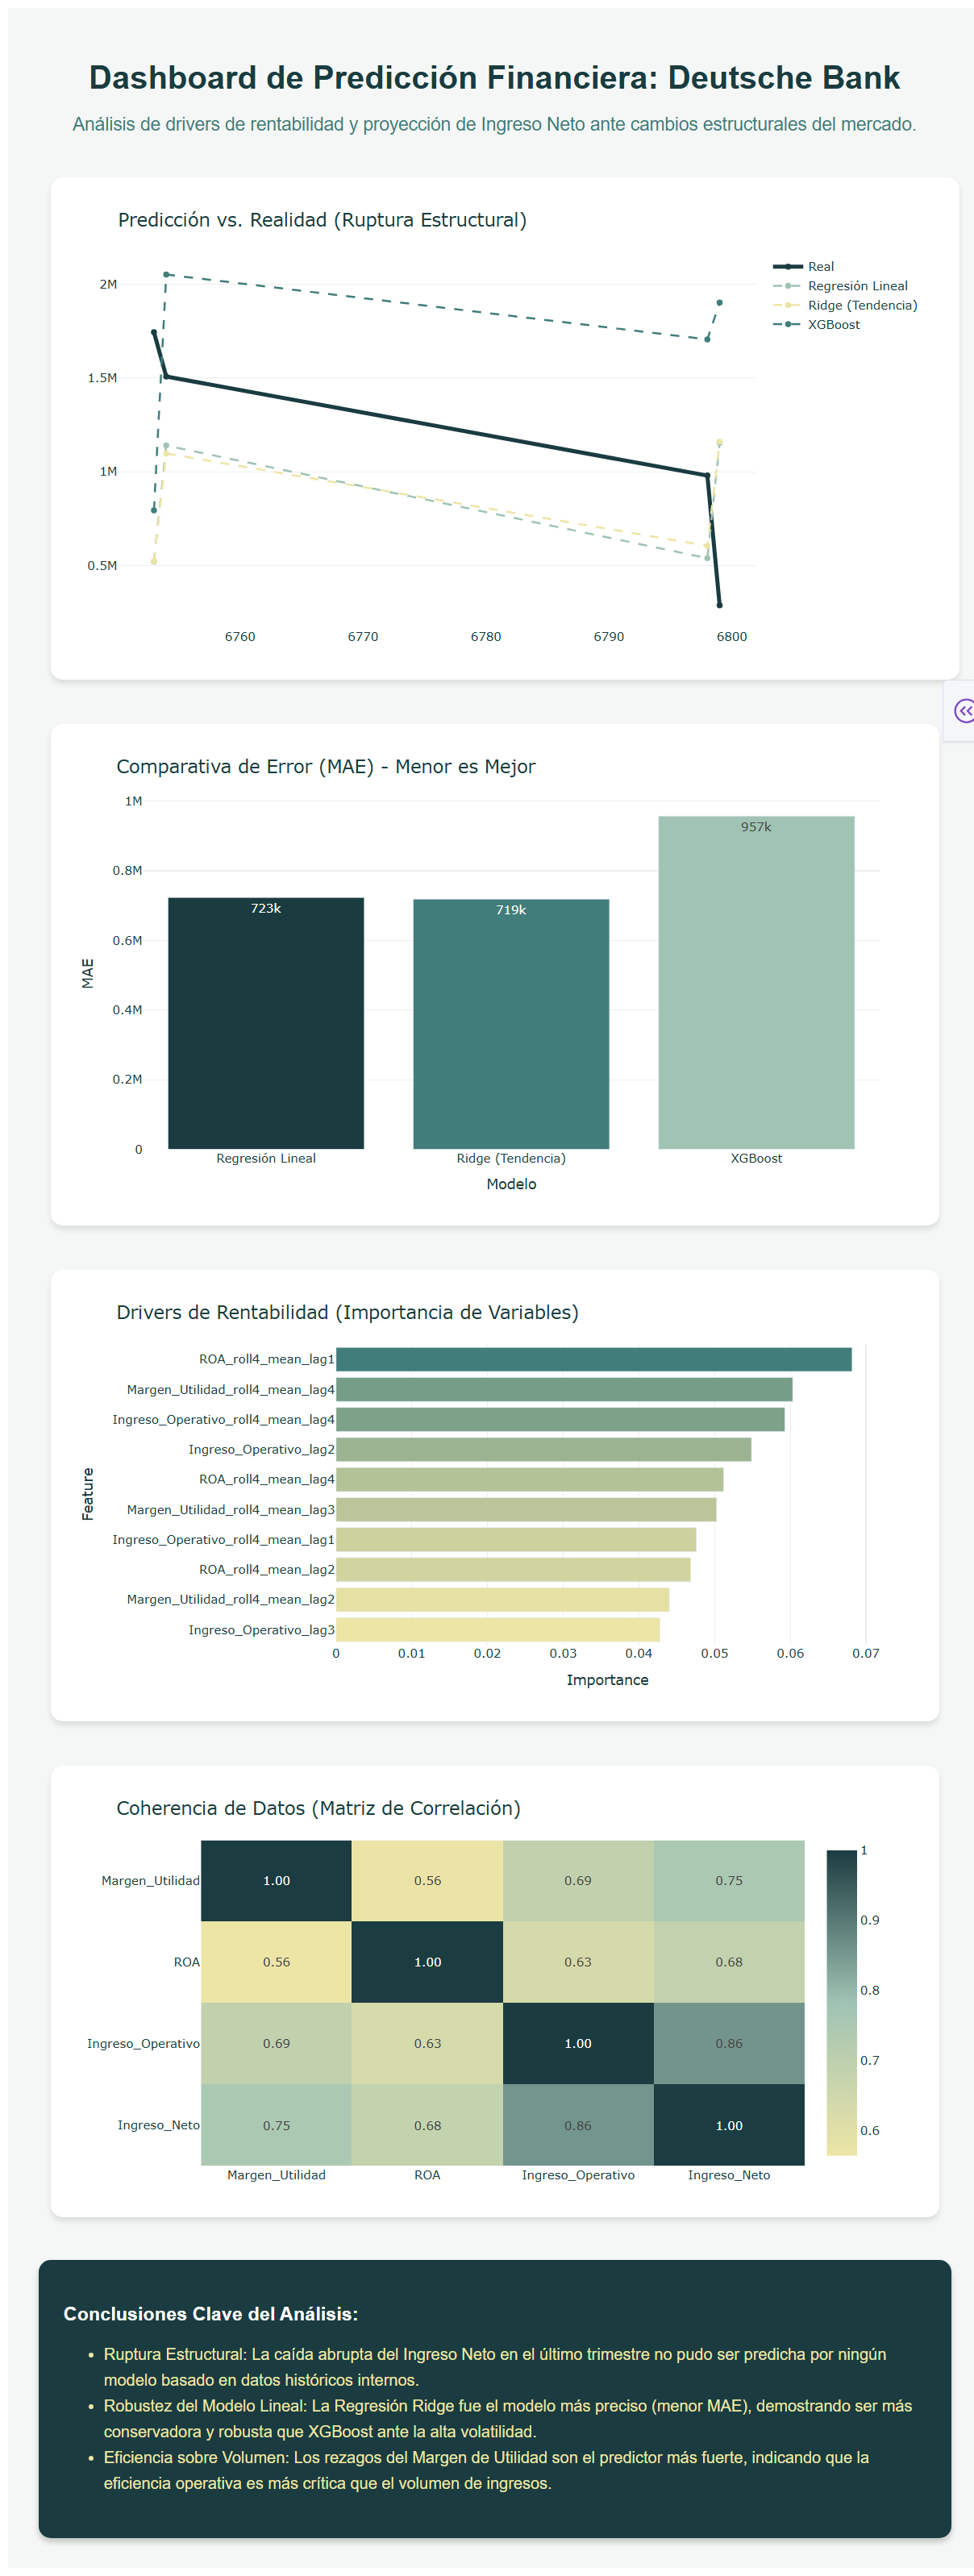

In [101]:
from IPython.display import Image

Image(filename='Dashboard_Financiero.png', width=800)

**Gráfica 1: Predicción vs. Realidad (Ruptura Estructural)**

Como se puede observar en la gráfica 1, se detectó un evento de 'cisne negro' o choque externo en el último trimestre. Mientras nuestros modelos proyectaban estabilidad basada en la historia del banco (líneas punteadas), la realidad (línea sólida) mostró una caída abrupta de ingresos. Esto confirma que la crisis reciente no se debe a un deterioro operativo gradual, sino a un cambio estructural repentino que los datos históricos internos no podían anticipar. Se recomienda incorporar indicadores de riesgo macroeconómico para futuras proyecciones.

**Gráfica 2: Comparativa de Error (MAE) - (Tendencia a la baja, menor es mejor)**

En entornos de alta incertidumbre, la estrategia conservadora pagó mejor. El modelo Ridge (barra central) demostró ser el más confiable, con el menor margen de error frente a la caída real. Por el contrario, los modelos de alta complejidad (XGBoost) intentaron encontrar patrones inexistentes, resultando en proyecciones demasiado optimistas y erróneas. Conclusión: Para el próximo año fiscal, debemos basar nuestros presupuestos en modelos lineales robustos y conservadores, evitando la sobre-ingeniería.

**Gráfica 3: Drivers de Rentabilidad (Importancia de Variables)**

El análisis revela que la eficiencia es más rentable que el volumen. El factor #1 que predice la utilidad neta (Ingresos Netos) futura es el comportamiento histórico del Margen de Utilidad, pesando mucho más que el volumen bruto de Ingresos Operativos. Estratégicamente, esto significa que cortar costos innecesarios y optimizar márgenes tendrá un impacto mucho mayor en el resultado final (Bottom Line) que simplemente intentar vender más agresivamente.

**Gráfica 4: Coherencia de Datos (Matriz de Correlación)**

Validamos la salud financiera de los datos analizados. Existe una correlación positiva y lógica entre el ROA y el Margen de Utilidad. Esto nos da confianza en que la rentabilidad del banco es genuina y proviene de su eficiencia operativa, descartando que los resultados estén siendo inflados artificialmente por deuda excesiva o maniobras contables.

### Uso y Beneficios del Dashboard
Este dashboard está diseñado estratégicamente para Directivos Financieros (CFOs), Analistas de Riesgo y Planeación Estratégica de Deutsche Bank. Su objetivo central es transformar modelos matemáticos complejos en inteligencia de negocios accionable para la toma de decisiones en entornos de alta incertidumbre.

Algunos de los beneficios clave para la toma de decisiones son:

- Mitigación de Riesgos en Proyecciones: Permite a los directivos identificar visualmente "rupturas estructurales" (shocks de mercado) donde los modelos históricos fallan. Al visualizar la brecha entre la línea de "Predicción" y "Realidad", la gerencia puede decidir rápidamente abandonar proyecciones automáticas e incorporar comités de expertos ante crisis agudas.

- Optimización de la Estrategia Operativa: Gracias al gráfico de Drivers de Rentabilidad, el equipo de estrategia puede concluir con un solo vistazo que el Margen de Utilidad es el motor principal del negocio. Esto fundamenta la decisión de priorizar iniciativas de eficiencia y reducción de costos por encima de campañas agresivas de captación de volumen, maximizando así el retorno financiero.

- Selección de Herramientas de Pronóstico: Simplifica la discusión técnica sobre qué modelo utilizar. Al mostrar claramente que el modelo lineal (Ridge) tiene una barra de error menor que el modelo complejo (XGBoost), justifica ante los stakeholders la adopción de metodologías conservadoras y robustas para el presupuesto del siguiente año fiscal, evitando la sobre-ingeniería.

- Monitoreo de Salud Financiera: La matriz de correlación ofrece a los auditores y analistas una validación rápida de la coherencia de los datos, asegurando que las proyecciones de rentabilidad estén respaldadas por fundamentos operativos reales (ROA) y no por anomalías contables.

## Bibliografía

Libros Utilizados
- Metodología Estadística y Preprocesamiento Sobre Winsorización y Outliers:
    Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley. (Fuente original de los Boxplots y el uso del Rango Intercuartílico para detectar valores atípicos).

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. 

- Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control. John Wiley & Sons.      
    (Fundamento teórico sobre el uso de retardos/lags y autocorrelación en datos financieros).

- J. Toro López, Francisco. (2021). Ciencia de los datos con Python

- M. Ortega Candel, José. (2019). Big Data, Machine Learning y Data Science en Python.

Algoritmos y Modelos Utilizados

Regresión Ridge (Regularización):

    Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Biased Estimation for Nonorthogonal Problems. Technometrics, 12(1), 55-67. (Fuente primaria sobre por qué Ridge funciona mejor que la regresión simple cuando hay correlación entre variables).

XGBoost (Machine Learning):

    Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785-794). ACM. (Cita obligatoria si usas XGBoost).

Herramientas y Librerías de Software
Pandas y Python:

    McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 51-56). (Creador de Pandas).

Scikit-Learn:

    Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

Documentación de Python
    Url: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Fuentes de Datos (Dataset)
Deutsche Bank Financial Data:

    Kaggle. (2024). Deutsche Bank Financial Performance Dataset. Recuperado de 
https://www.kaggle.com/datasets/heidarmirhajisadati/deutschebank-financial-performance 

    Deutsche Bank AG. (2024). Annual Reports and Quarterly Results. Investor Relations. (Fuente primaria de los datos financieros reales).